# Data Quality Validation and Analysis

This notebook implements the data validation workflow for our banking system, handling both transaction and customer data.

## 1. Setup and Data Loading

First, we'll import necessary libraries and load our data files.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import great_expectations as gx
from datetime import datetime
import warnings 

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set up plotting style
sns.set()
sns.set_palette('husl')

# Load the data files
transactions_df = pd.read_csv('../data/working/transactions.csv')
customers_df = pd.read_csv('../data/working/sebank_customers_with_accounts.csv')

print(f"Loaded {len(transactions_df)} transactions and {len(customers_df)} customer records.")

Loaded 100000 transactions and 1000 customer records.


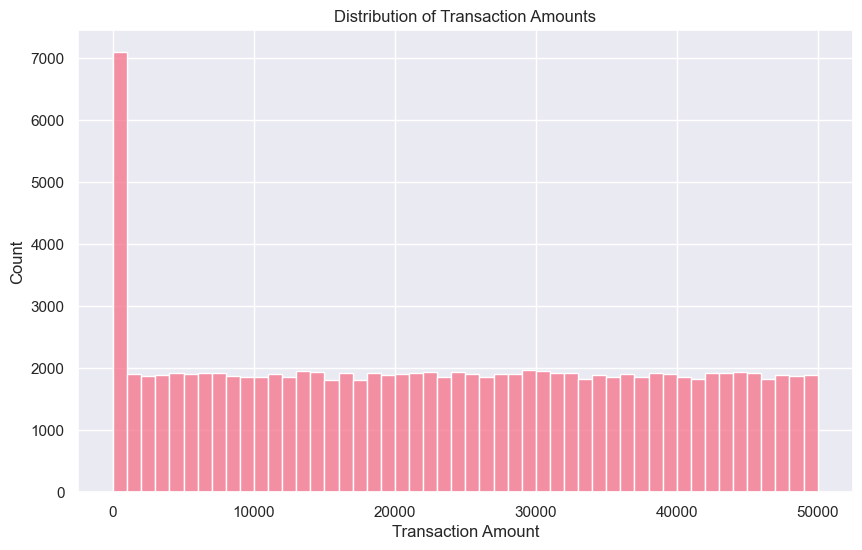

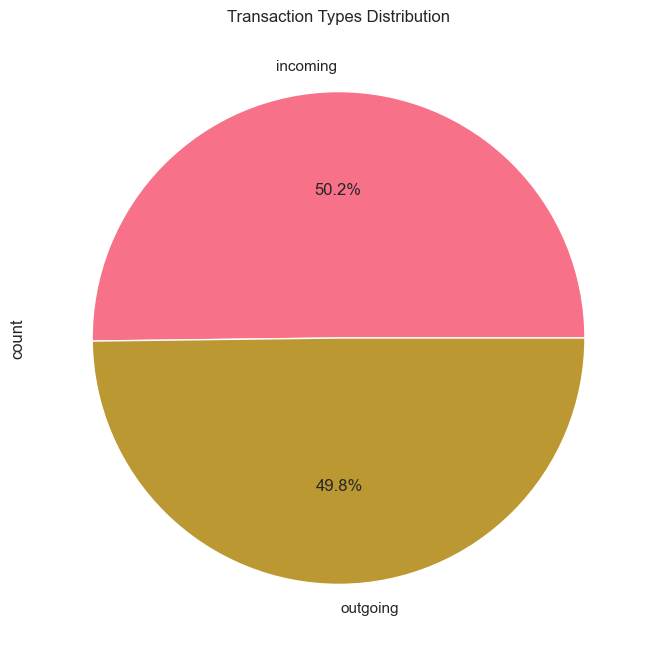

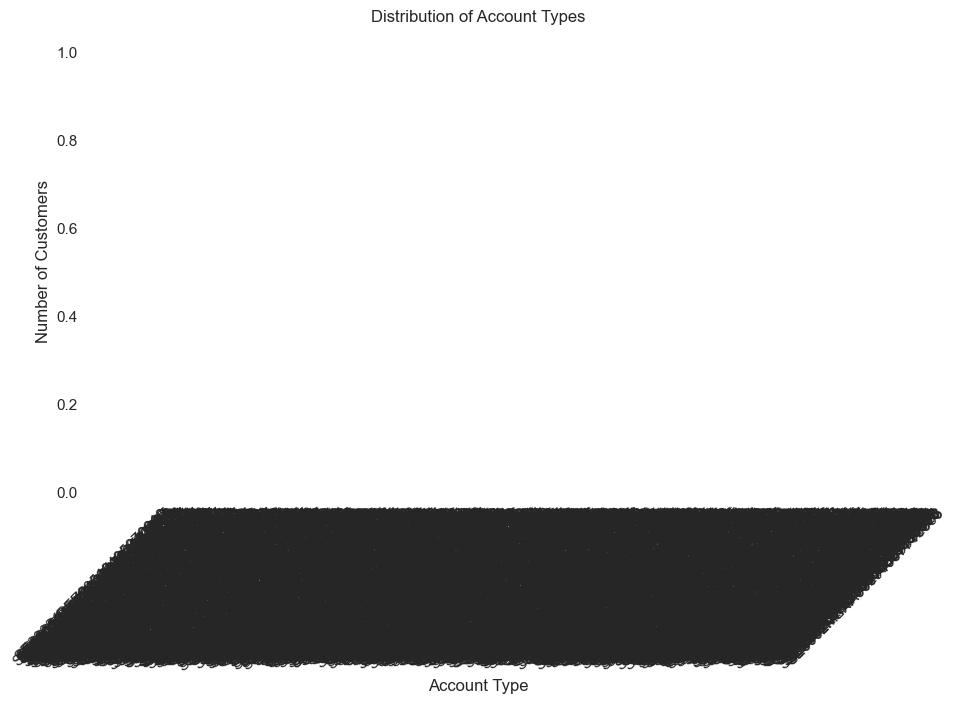


Transaction Amount Statistics:
count    100000.000000
mean      23712.387879
std       15052.980574
min           5.260000
25%       10439.495000
50%       23629.195000
75%       36750.987500
max       49999.220000
Name: amount, dtype: float64

Number of Transactions per Type:
transaction_type
incoming    50199
outgoing    49801
Name: count, dtype: int64


In [5]:
# 1. Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=transactions_df, x='amount', bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

# 2. Transaction Types Breakdown
plt.figure(figsize=(8, 8))
transactions_df['transaction_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Transaction Types Distribution')
plt.show()

# 3. Customer Account Types (Korrigerad)
plt.figure(figsize=(10, 6))
customers_df['BankAccount'].value_counts().plot(kind='bar')  # Ändrat från 'account_type' till 'BankAccount'
plt.title('Distribution of Account Types')
plt.xlabel('Account Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# 4. Basic Statistics
print("\nTransaction Amount Statistics:")
print(transactions_df['amount'].describe())

print("\nNumber of Transactions per Type:")
print(transactions_df['transaction_type'].value_counts())

## Data Validation

### 1. Transaction Data Validation
We will validate the transaction data by checking:
- Missing values
- Duplicate transactions
- Valid transaction types (incoming/outgoing)

### 2. Account Number Validation
For account numbers we will verify:
- Account number format (should be numeric string)
- Account existence (all transaction accounts should exist in customer database)

The validation results will be summarized at the end.

In [8]:
# Data Validation Implementation

# 1. Transaction Data Validation
print("Validating Transaction Data...")

# Check for missing values
print("\nMissing values in transactions:")
print(transactions_df.isnull().sum())

# Check for duplicate transactions
duplicate_transactions = transactions_df.duplicated().sum()
print(f"\nNumber of duplicate transactions: {duplicate_transactions}")

# Validate transaction types
valid_transaction_types = ['incoming', 'outgoing']
invalid_types = transactions_df[~transactions_df['transaction_type'].isin(valid_transaction_types)]
print(f"\nNumber of invalid transaction types: {len(invalid_types)}")

# 2. Account Number Validation
print("\nValidating Account Numbers...")

# Check account number format
def validate_account_number(account):
    # Basic validation: Should be a string of numbers
    if isinstance(account, str) and account.isdigit():
        return True
    return False

invalid_accounts = customers_df[~customers_df['BankAccount'].apply(validate_account_number)]
print(f"\nNumber of invalid account numbers in customer database: {len(invalid_accounts)}")

# Get all unique accounts from transactions (both sender and receiver)
transaction_accounts = set(transactions_df['sender_account'].unique()) | set(transactions_df['receiver_account'].unique())
customer_accounts = set(customers_df['BankAccount'].unique())
unknown_accounts = transaction_accounts - customer_accounts
print(f"\nNumber of accounts in transactions not found in customer database: {len(unknown_accounts)}")

# Display validation summary
print("\nValidation Summary:")
print("-" * 50)
print(f"Total Transactions: {len(transactions_df)}")
print(f"Missing Values: {transactions_df.isnull().sum().sum()}")
print(f"Duplicate Transactions: {duplicate_transactions}")
print(f"Invalid Transaction Types: {len(invalid_types)}")
print(f"Invalid Account Numbers in Customer Database: {len(invalid_accounts)}")
print(f"Unknown Accounts in Transactions: {len(unknown_accounts)}")

# Additional geographical validation
print("\nGeographical Data Validation:")
print("-" * 50)
print("Unique sender countries:", transactions_df['sender_country'].nunique())
print("Unique receiver countries:", transactions_df['receiver_country'].nunique())
print("\nTop 5 sender countries:")
print(transactions_df['sender_country'].value_counts().head())
print("\nTop 5 receiver countries:")
print(transactions_df['receiver_country'].value_counts().head())

Validating Transaction Data...

Missing values in transactions:
transaction_id              0
timestamp                   0
amount                      0
currency                    0
sender_account              0
receiver_account            0
sender_country            500
sender_municipality       500
receiver_country          500
receiver_municipality     500
transaction_type            0
notes                    9948
dtype: int64

Number of duplicate transactions: 0

Number of invalid transaction types: 0

Validating Account Numbers...

Number of invalid account numbers in customer database: 1000

Number of accounts in transactions not found in customer database: 90000

Validation Summary:
--------------------------------------------------
Total Transactions: 100000
Missing Values: 11948
Duplicate Transactions: 0
Invalid Transaction Types: 0
Invalid Account Numbers in Customer Database: 1000
Unknown Accounts in Transactions: 90000

Geographical Data Validation:
---------------------